Họ và tên: Trương Quốc Bình

MSSV: 19521270

Bài tập: BT3-Cài đặt Linear Regression, Logistic Regression, Softmax Regression với Tensorflow/Pytorch 

# **1. Logistic_Regression**

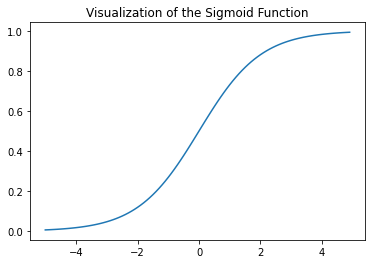

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
	return 1 / (1 + np.exp( - z))

plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1)))
plt.title('Visualization of the Sigmoid Function')

plt.show()


In [ ]:
# importing modules
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow.compat.v1 as tf

In [ ]:
data = pd.read_csv('dataset.csv', header = None)
print("Data Shape:", data.shape)

print(data.head())


Data Shape: (100, 4)
   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


In [ ]:
# Feature Matrix
x_orig = data.iloc[:, 1:-1].values

# Data labels
y_orig = data.iloc[:, -1:].values

print("Shape of Feature Matrix:", x_orig.shape)
print("Shape Label Vector:", y_orig.shape)


Shape of Feature Matrix: (100, 2)
Shape Label Vector: (100, 1)


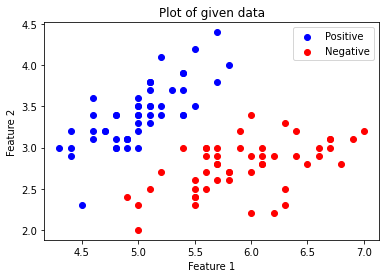

In [ ]:
# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 0])

# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive')

# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()

plt.show()


In [ ]:
# Creating the One Hot Encoder
oneHot = OneHotEncoder()

# Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

# Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

alpha, epochs = 0.0035, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)


m = 100
n = 51
Learning Rate = 0.0035
Number of Epochs = 500


In [ ]:
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# There are n columns in the feature matrix
# after One Hot Encoding.
X = tf.placeholder(tf.float32, [None, n])

# Since this is a binary classification problem,
# Y can take only 2 values.
Y = tf.placeholder(tf.float32, [None, 2])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 2]))

# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))


In [ ]:
# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(
					logits = Y_hat, labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(
		learning_rate = alpha).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()


In [ ]:
# Starting the Tensorflow Session
with tf.Session() as sess:
	
	# Initializing the Variables
	sess.run(init)
	
	# Lists for storing the changing Cost and Accuracy in every Epoch
	cost_history, accuracy_history = [], []
	
	# Iterating through all the epochs
	for epoch in range(epochs):
		cost_per_epoch = 0
		
		# Running the Optimizer
		sess.run(optimizer, feed_dict = {X : x, Y : y})
		
		# Calculating cost on current Epoch
		c = sess.run(cost, feed_dict = {X : x, Y : y})
		
		# Calculating accuracy on current Epoch
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
										tf.argmax(Y, 1))
		accuracy = tf.reduce_mean(tf.cast(correct_prediction,
												tf.float32))
		
		# Storing Cost and Accuracy to the history
		cost_history.append(sum(sum(c)))
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
		
		# Displaying result on current Epoch
		if epoch % 100 == 0 and epoch != 0:
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1]))
	
	Weight = sess.run(W) # Optimized Weight
	Bias = sess.run(b) # Optimized Bias
	
	# Final Accuracy
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
									tf.argmax(Y, 1))
	accuracy = tf.reduce_mean(tf.cast(correct_prediction,
											tf.float32))
	print("\nAccuracy:", accuracy_history[-1], "%")


Epoch 100 Cost: 136.33413696289062
Epoch 200 Cost: 132.68544006347656
Epoch 300 Cost: 129.77123260498047
Epoch 400 Cost: 127.2939567565918

Accuracy: 87.00000047683716 %


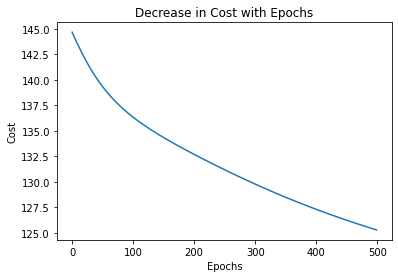

In [ ]:
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')

plt.show()


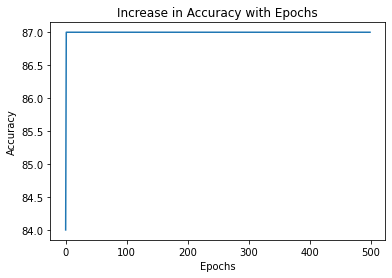

In [ ]:
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')

plt.show()


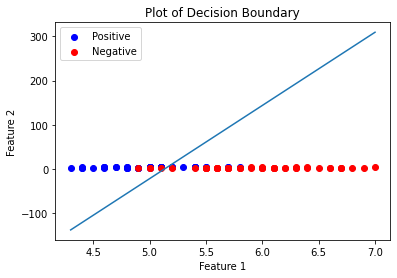

In [ ]:
# Calculating the Decision Boundary
decision_boundary_x = np.array([np.min(x_orig[:, 0]),
							np.max(x_orig[:, 0])])

decision_boundary_y = (- 1.0 / Weight[0]) *(decision_boundary_x * Weight + Bias)

decision_boundary_y = [sum(decision_boundary_y[:, 0]),
					sum(decision_boundary_y[:, 1])]

# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 0])

# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1],
color = 'blue', label = 'Positive')

# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1],
color = 'red', label = 'Negative')

# Plotting the Decision Boundary
plt.plot(decision_boundary_x, decision_boundary_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of Decision Boundary')
plt.legend()

plt.show()


# **2. Softmax_Regression**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.compat.v1 as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

Shape of Images:  (60000, 28, 28)
Shape of Labels: (60000,)


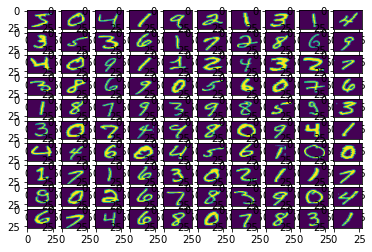

In [ ]:
print("Shape of Images: ", x_train.shape) 
print("Shape of Labels:" , y_train.shape)

fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
	for j in range(10):
			ax[i][j].imshow(x_train[k], aspect='auto') 
			k += 1 
plt.show()

In [ ]:
num_features = 784 #28*28
num_labels = 10
learning_rate = 0.001
batch_size = 32
training_epochs = 10
display_step = 1


In [ ]:
def to_onehot(y):
  data = np.zeros((num_labels))
  data[y] = 1
  return data
x_train = np.reshape(x_train,(-1, num_features))
x_test = np.reshape(x_test,(-1, num_features))

y_train = np.array([to_onehot(y) for y in y_train])
y_test  = np.array([to_onehot(y) for y in y_test])


In [ ]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [ ]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
x = tf.placeholder(tf.float32, shape=[None, num_features]) 
y = tf.placeholder(tf.float32, shape=[None, num_labels])

In [ ]:
#	Weight
w = tf.Variable(tf.zeros([num_features, num_labels]))
#	Bias
b = tf.Variable(tf.zeros([num_labels]))

In [ ]:
#	Construct model
pred = tf.nn.softmax(tf.matmul(x, w) + b) # Softmax
#	Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
#	Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
# Initialize the variables (i.e. assign their default value) 
init = tf.global_variables_initializer()

In [ ]:
def accuracy(predictions, labels):
  correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
  acc = (100.0 * correctly_predicted) / predictions.shape[0] 
  return acc

In [ ]:
with tf.Session() as sess:
  #	Run the initializer sess.run(init)
  sess.run(init)

  #	Training cycle
  for epoch in range(training_epochs):
    avg_cost = 0.0 
    avg_acc = 0.0
    total_batch = len(x_train)//batch_size
    
    for i in range(total_batch):
      batch_x = x_train[i:i+1*batch_size] 
      batch_y = y_train[i:i+1*batch_size]
  
      _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y}) 
      avg_cost += c/total_batch

      pred_y = sess.run(pred, feed_dict={x: batch_x}) 
      acc = accuracy(pred_y, batch_y) 
      avg_acc += acc/total_batch
  
    if (epoch+1) % display_step == 0:
      tc = sess.run(cost, feed_dict={x: x_test, y: y_test}) 
      pred_y = sess.run(pred, feed_dict={x: x_test}) 
      ta = accuracy(pred_y, y_test)

      print("Epoch: {:2.0f} - Cost: {: 1.5f} - Acc: {:0.5f} - Test Cost: {:0.5f} - Test acc:{:0.5f}".format(
          epoch+1, avg_cost, avg_acc, tc,ta))
  print("Optimization Finshed")

  #test model
  correctly_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
  #caculate accuracy
  acc = tf.reduce_mean(tf.cast(correctly_prediction, tf.float32))
  print("Test Accuracy:", acc.eval({x:x_test, y: y_test}))

Epoch:  1 - Cost:  1.62461 - Acc: 73.62000 - Test Cost: 1.23438 - Test acc:77.73000
Epoch:  2 - Cost:  1.00996 - Acc: 83.20833 - Test Cost: 0.91878 - Test acc:81.09000
Epoch:  3 - Cost:  0.79427 - Acc: 84.88667 - Test Cost: 0.77765 - Test acc:82.72000
Epoch:  4 - Cost:  0.68457 - Acc: 86.03833 - Test Cost: 0.69650 - Test acc:83.87000
Epoch:  5 - Cost:  0.61639 - Acc: 87.03833 - Test Cost: 0.64296 - Test acc:84.66000
Epoch:  6 - Cost:  0.56889 - Acc: 87.69000 - Test Cost: 0.60460 - Test acc:85.15000
Epoch:  7 - Cost:  0.53331 - Acc: 88.29500 - Test Cost: 0.57556 - Test acc:85.52000
Epoch:  8 - Cost:  0.50531 - Acc: 88.73500 - Test Cost: 0.55271 - Test acc:85.98000
Epoch:  9 - Cost:  0.48247 - Acc: 89.14667 - Test Cost: 0.53422 - Test acc:86.29000
Epoch: 10 - Cost:  0.46332 - Acc: 89.40000 - Test Cost: 0.51892 - Test acc:86.49000
Optimization Finshed
Test Accuracy: 0.8649


# **3. Linear_Regression**

In [ ]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
import imageio
import tensorflow.compat.v1 as tf

In [ ]:
tf.disable_v2_behavior()

In [ ]:
x = np.arange(0, 1, 0.01)
y = np.arange(2, 4, 0.02) + np.random.randn(x.shape[0],) * 0.2

In [ ]:
x_train = tf.constant(x, dtype=np.float32, shape=[x.shape[0], 1])
y_train = tf.constant(y, dtype=np.float32, shape=[x.shape[0], 1])
with tf.compat.v1.variable_scope("foo"):
    weights = tf.compat.v1.get_variable("weights", [1, 1],
                    initializer=tf.random_normal_initializer())
    biases = tf.compat.v1.get_variable("biases", [1, 1],
                    initializer=tf.constant_initializer(0.0))

In [ ]:
y_hat = tf.add(tf.matmul(x_train, weights), biases)

In [ ]:
loss = tf.reduce_mean(tf.square(y_hat - y_train))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

In [ ]:
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(200):
        _, loss_value = sess.run((train, loss))
        if i % 5 == 0:
            print(loss_value)


13.619918
1.0001183
0.28546008
0.2228465
0.19870715
0.17924358
0.16229324
0.14745718
0.13446769
0.123094656
0.11313694
0.104418375
0.0967848
0.090101175
0.084249236
0.07912558
0.07463954
0.07071174
0.06727271
0.06426167
0.061625328
0.059317067
0.05729604
0.055526517
0.053977206
0.0526207
0.051433004
0.050393116
0.049482632
0.048685435
0.047987465
0.04737634
0.046841275
0.046372786
0.045962602
0.04560347
0.04528902
0.045013696
0.044772655
0.04456159
